In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
%pip install xlrd==2.0.1

Note: you may need to restart the kernel to use updated packages.


In [34]:
sales_2022 = pd.read_excel('./data/HGMI-SALES-2022-EXEDY BRAND.xls', skiprows=5)

                               TOTAL
DESCRIPTION                         
CLUTCH COVER ASSEMBLY    65965787.70
CLUTCH DISC ASSEMBLY     89214686.29
CLUTCH KIT WITH BEARING     68500.00
CLUTCH RELEASE BEARING     752792.50
CLUTCH SET                2724476.50
FLY WHEEL                   37000.00


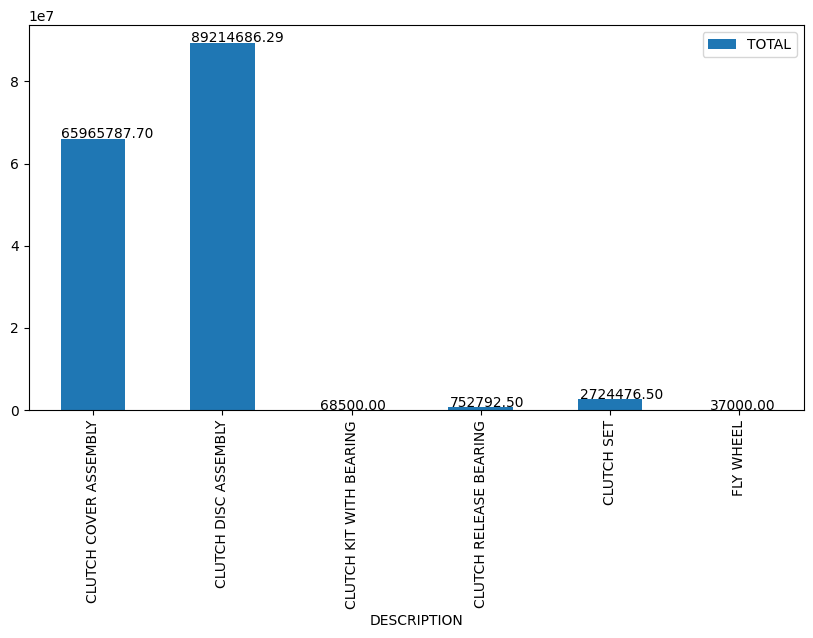

In [36]:
pivot_table = sales_2022.pivot_table(index='DESCRIPTION', values='TOTAL', aggfunc='sum')
print(pivot_table)
ax = pivot_table.plot(kind='bar', figsize=(10, 5))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

                                TOTAL
DESCRIPTION                          
CLUTCH COVER ASSEMBLY    12982.835603
CLUTCH DISC ASSEMBLY     14893.937611
CLUTCH KIT WITH BEARING   9785.714286
CLUTCH RELEASE BEARING    6546.021739
CLUTCH SET               13971.674359
FLY WHEEL                37000.000000


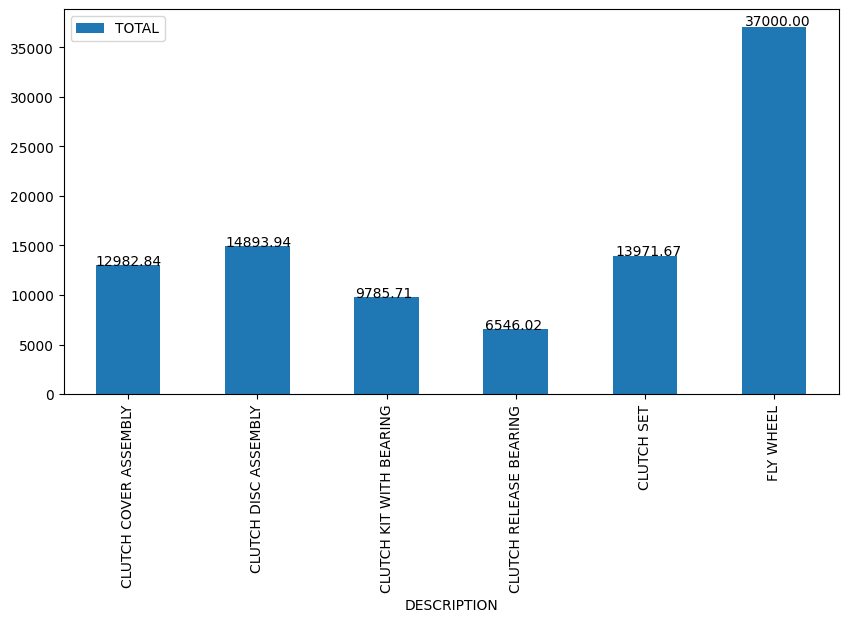

In [37]:
pivot_table_mean = sales_2022.pivot_table(index='DESCRIPTION', values='TOTAL', aggfunc='mean')
print(pivot_table_mean)
ax = pivot_table_mean.plot(kind='bar', figsize=(10, 5))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()